In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [4]:
import sys
sys.path.append('./models') 
from gaussian import GP
from gaussian import RBF
from bandit import Bandit

sys.path.append('./train_data') 
from train_func import TrueFunc

In [85]:
# 教師データ
# 期待値関数のパラメータ設定
train_func_sigma = 0.3
train_func_max = 0.5
# train_func = TrueFunc(train_func_sigma, train_func_max, True).peak_one
train_func = TrueFunc(train_func_sigma, train_func_max).peak_one


# モデルの設定
# RBFカーネルのパラメータ
rbf_alpha = 0.3
rbf_beta = 0.1
kernel = RBF(rbf_beta, rbf_alpha)

# ガウス過程のパラメータ
GP_ME = 0.5
gp_noise = 0.1

# プレイス　するバンディット問題の設定
n_play = 500
n_sample = 100

In [69]:
kernel = RBF(rbf_beta, rbf_alpha)
model = GP(GP_ME, gp_noise, kernel)
bandit = Bandit(n_play, n_sample)
train, reward = bandit.gp_ts(train_func, model)

print(f'total reward is {sum(reward)}')

total reward is 11


In [70]:
sys.path.append('../results') 
import b_plot

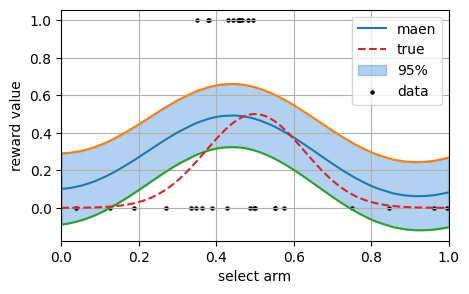

In [71]:
p_train_func = TrueFunc(train_func_sigma, train_func_max, True).peak_one
b_plot.gp(model, p_train_func, train, reward, titel = "")

In [72]:
kernel = RBF(rbf_beta, rbf_alpha)
model = GP(GP_ME, gp_noise, kernel)
bandit = Bandit(n_play, n_sample)
train, reward = bandit.gp_ucb(train_func, model)

print(f'total reward is {sum(reward)}')

total reward is 18


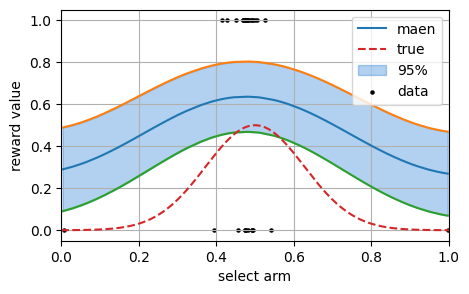

In [73]:
p_train_func = TrueFunc(train_func_sigma, train_func_max, True).peak_one
b_plot.gp(model, p_train_func, train, reward, titel = "")

In [86]:
kernel = RBF(rbf_beta, rbf_alpha)
model = GP(GP_ME, gp_noise, kernel)
bandit = Bandit(n_play, n_sample)
train, reward = bandit.random(train_func, model)

print(f'total reward is {sum(reward)}')

total reward is 78


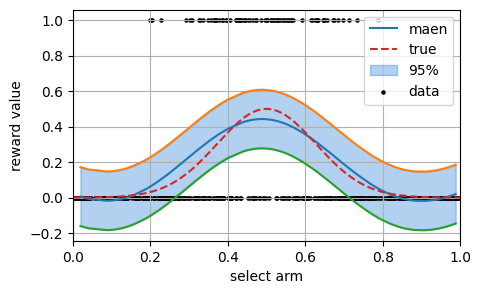

In [87]:
p_train_func = TrueFunc(train_func_sigma, train_func_max, True).peak_one
b_plot.gp(model, p_train_func, train, reward, titel = "")